This Notebook uses Python2.7

In [1]:
%matplotlib inline
import pandas as pd
import string
import matplotlib 
import matplotlib.pyplot as pyplot
import seaborn as sb
import numpy as np

In [2]:
dataPath = "data/train.csv"
traindata = pd.read_csv(dataPath)

In [3]:
traindata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
traindata['LastName'] = traindata['Name'].apply(lambda x: x.split(",")[0].translate(None, string.punctuation).strip())
traindata['FirstName'] = traindata['Name'].apply(lambda x: x.split(",")[1].split(".")[1].translate(None, string.punctuation).strip())
traindata['Title'] = traindata['Name'].apply(lambda x: x.split(",")[1].split(".")[0].strip())
traindata = traindata.drop(['Name'],axis=1)
traindata.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,FirstName,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Owen Harris,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,John Bradley Florence Briggs Thayer,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Laina,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Jacques Heath Lily May Peel,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,William Henry,Mr


In [5]:
print(traindata.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [6]:
print(traindata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
LastName       891 non-null object
FirstName      891 non-null object
Title          891 non-null object
dtypes: float64(2), int64(5), object(7)
memory usage: 97.5+ KB
None


In [7]:
# traindata[traindata.isnull().any(axis=1)]
print(traindata.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
LastName         0
FirstName        0
Title            0
dtype: int64


In [8]:
testpath = "data/test.csv"
testdata = pd.read_csv(testpath)
testdata.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
testdata['LastName'] = testdata['Name'].apply(lambda x: x.split(",")[0].translate(None, string.punctuation).strip())
testdata['FirstName'] = testdata['Name'].apply(lambda x: x.split(",")[1].split(".")[1].translate(None, string.punctuation).strip())
testdata['Title'] = testdata['Name'].apply(lambda x: x.split(",")[1].split(".")[0].strip())
testdata = testdata.drop(['Name'],axis=1)
testdata.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,FirstName,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,Kelly,James,Mr
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,Wilkes,James Ellen Needs,Mrs
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,Myles,Thomas Francis,Mr
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,Wirz,Albert,Mr
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,Hirvonen,Alexander Helga E Lindqvist,Mrs


In [10]:
print(testdata.describe())


       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


In [11]:
print(testdata.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
LastName       418 non-null object
FirstName      418 non-null object
Title          418 non-null object
dtypes: float64(2), int64(4), object(7)
memory usage: 42.5+ KB
None


In [12]:
# traindata[traindata.isnull().any(axis=1)]
print(testdata.isnull().sum())

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
LastName         0
FirstName        0
Title            0
dtype: int64


In [13]:
# listing the parametersof the functions
# print(pd.read_csv.__code__.co_argcount)
# print(pd.read_csv.__code__.co_varnames)


# Visualizations
* Looking for Relationship between each column to the target variable using graphs
* Looking for Relationship between each column with each other using graphs

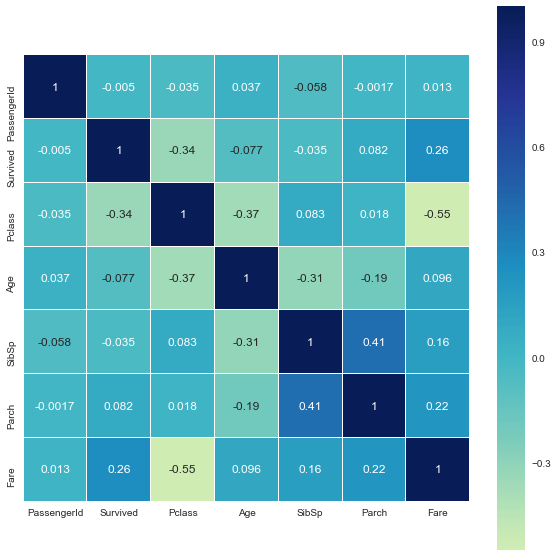

In [14]:
# HeatMap for the Correlations 
sb.set(style="whitegrid")
pyplot.figure(figsize=(10,10))
# sb.heatmap(traindata.corr(method='pearson').abs(),square=True, vmax=1, linecolor="white", linewidths=0.01, annot=True, center=0, cmap=matplotlib.cm.get_cmap().reversed())
CorrHeatMap = sb.heatmap(traindata.corr(method='pearson'),square=True, vmax=1, linecolor="white", linewidths=0.01, annot=True, center=0, cmap="YlGnBu")

In [15]:
# Correlation of the other columns with target variable 
traindata.corr(method='pearson')['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

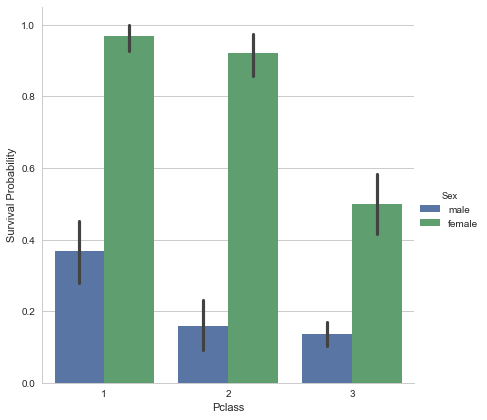

In [16]:
# Nested barplot to show survival for class and sex
GenderClass = sb.factorplot(x="Pclass", y="Survived", hue="Sex", data=traindata,size=6, kind="bar")
GenderClass.set_ylabels("Survival Probability")

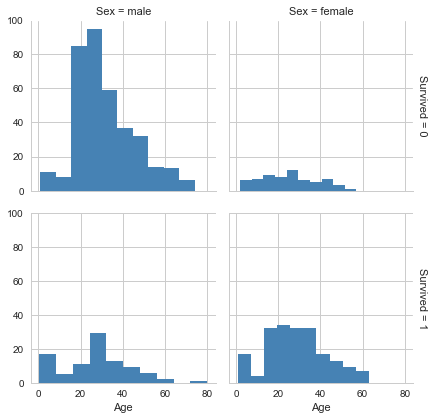

In [17]:
# Gender Age Graph 
GenderAge = sb.FacetGrid(traindata, row="Survived", col="Sex", margin_titles=True)
GenderAge.map(pyplot.hist, "Age", color="steelblue", linewidth=1)

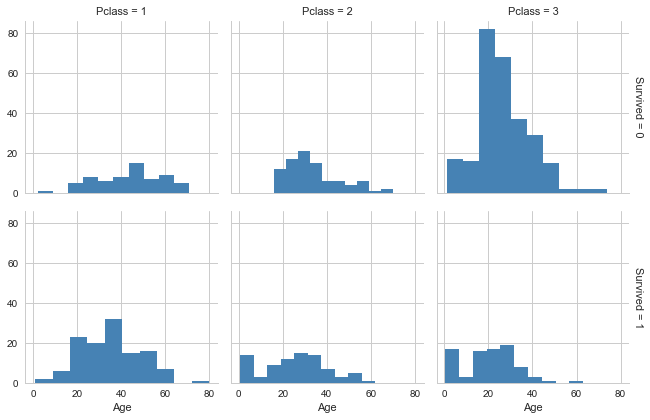

In [18]:
# Gender Age Graph 
GenderAge = sb.FacetGrid(traindata, row="Survived", col="Pclass", margin_titles=True)
GenderAge.map(pyplot.hist, "Age", color="steelblue")

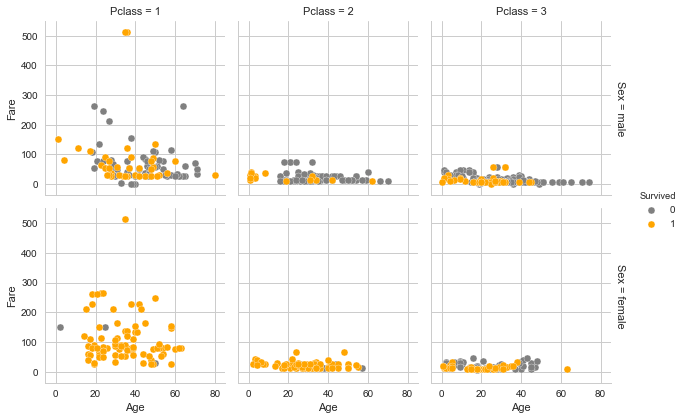

In [19]:
# Gender Class Age Fare Graph 
# GenderAge = sb.FacetGrid(traindata, hue="Sex", row="Survived", col="Pclass", margin_titles=True, palette={"male":"grey","female":"green"})
GenderAge = sb.FacetGrid(traindata, hue="Survived", row="Sex", col="Pclass", margin_titles=True, palette={0:"grey",1:"orange"})
# GenderAge = GenderAge.map(pyplot.scatter, "Fare", "Age", edgecolor="white").add_legend()
GenderAge = GenderAge.map(pyplot.scatter, "Age", "Fare", edgecolor="white").add_legend()

In [20]:
# Looking for effect of title on survival
traindata.groupby("Title").size()

Title
Capt              1
Col               2
Don               1
Dr                7
Jonkheer          1
Lady              1
Major             2
Master           40
Miss            182
Mlle              2
Mme               1
Mr              517
Mrs             125
Ms                1
Rev               6
Sir               1
the Countess      1
dtype: int64

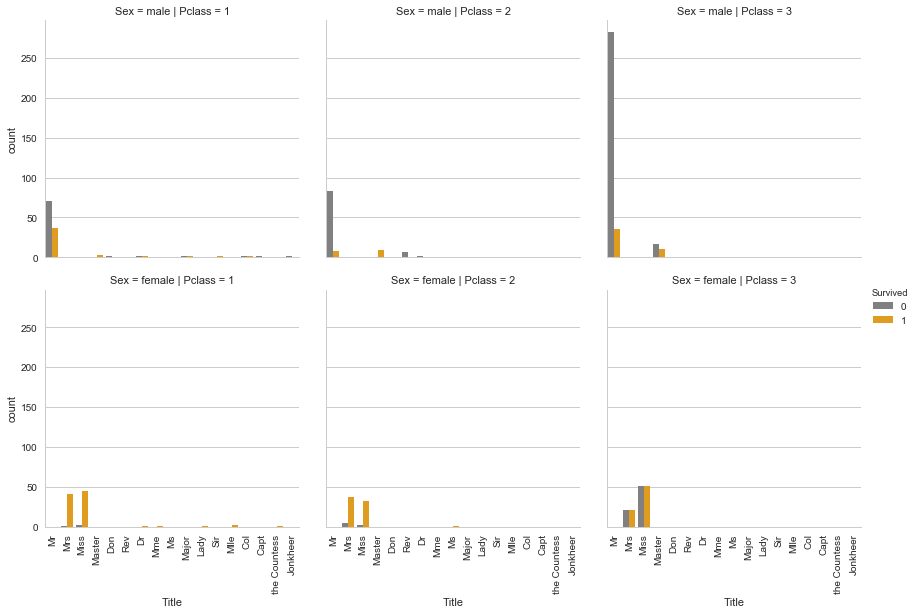

In [21]:
TitleFareSurvival = sb.factorplot(x="Title", hue="Survived", row="Sex", col="Pclass",data=traindata, kind="count", palette={0:"grey",1:"orange"})
TitleFareSurvival.set_xticklabels(rotation=90)

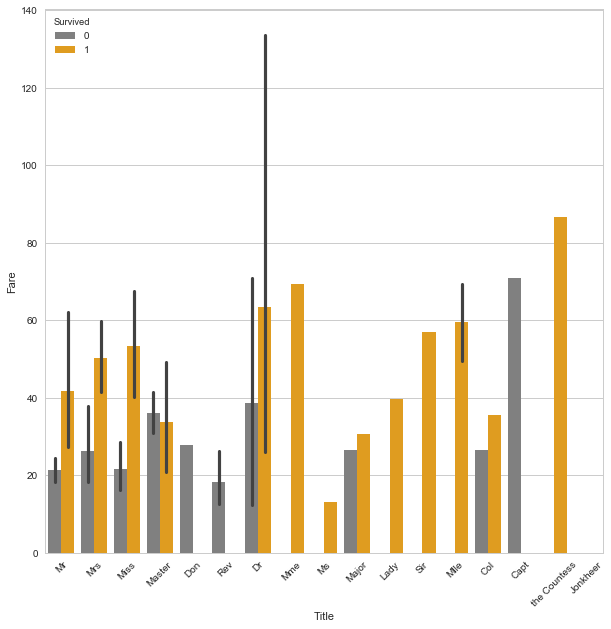

In [22]:
pyplot.figure(figsize=(10,10))
pyplot.xticks(rotation=45)
TitleAgeSurvival = sb.barplot(x="Title", y="Fare", hue="Survived", data=traindata, palette={0:"grey",1:"orange"})

# Missing Values 

As we are going to approximate few missing values it makes sense to look at complete data and approximate based on that, hence we need to combine Train Data (Without including the Survived Column as it is our target variable) and Test Data

In [23]:
data = traindata.drop(["Survived"], axis=1).append(testdata)
print(traindata.shape)
print(testdata.shape)
print(data.shape)

(891, 14)
(418, 13)
(1309, 13)


In [24]:
# testdata

## Missing Values -> Training Data 

If we look at Training data we can see that only two values for "Embarked", which we can be approximated.

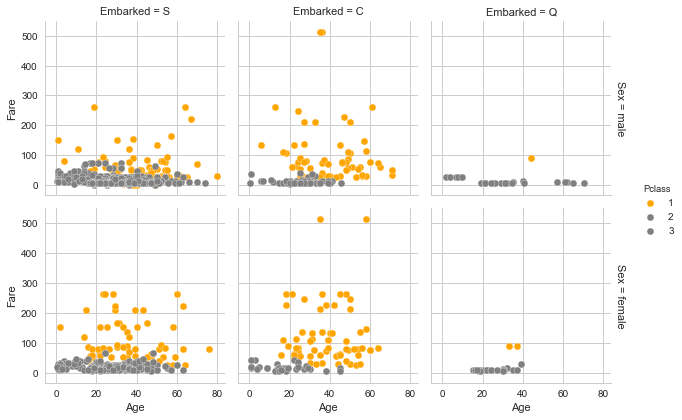

In [25]:
# Gender Class Age Fare Graph = For Embarked
GenderAge = sb.FacetGrid(data, hue="Pclass", row="Sex", col="Embarked", margin_titles=True, palette={2:"grey",3:"grey",1:"orange"})
GenderAge = GenderAge.map(pyplot.scatter, "Age", "Fare", edgecolor="white").add_legend()

In [26]:
traindata[traindata["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,FirstName,Title
61,62,1,1,female,38.0,0,0,113572,80.0,B28,NaN,Icard,Amelie,Miss
829,830,1,1,female,62.0,0,0,113572,80.0,B28,NaN,Stone,George Nelson Martha Evelyn,Mrs


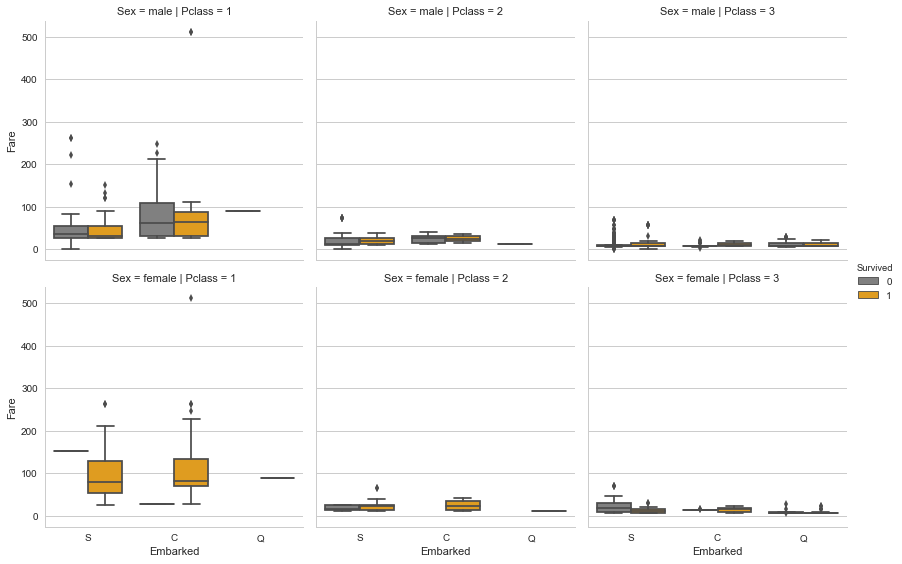

In [27]:
# GenderAgeBoxPlot = sb.FacetGrid(data, row="Sex", col="Pclass", margin_titles=True)
# GenderAgeBoxPlot = GenderAgeBoxPlot.map(sb.boxplot,"Embarked","Fare")
GenderAgeBoxPlot = sb.factorplot(x="Embarked", y="Fare", hue="Survived", row="Sex", col="Pclass",data=traindata, kind="box", palette={0:"grey",1:"orange"})

As we can see from above box plot, the missing values for female class 1 , are more probably either 'S' or 'C'.

In [28]:
data[(data["Pclass"] == 1) & (data["Sex"] == "female") & (data["Embarked"] == "S")]["Fare"].mean()

101.0691449275362

In [29]:
data[(data["Pclass"] == 1) & (data["Sex"] == "female") & (data["Embarked"] == "C")]["Fare"].mean()

118.89594929577467

In [30]:
traindata[(traindata["Embarked"]=="S") & (traindata["Sex"]=="female")]["PassengerId"].count()

203

In [31]:
traindata[(traindata["Embarked"]=="C") & (traindata["Sex"]=="female")]["PassengerId"].count()

73

As we can see from the above two tables :
    * For females who embarked at "S", Total Count = 203 and Avg Fare is 101
    * For females who embarked at "C", Total Count = 73 and Avg Fare is 118

Hence both the females with missing Embarked Value have mostly boarded on "S"

In [32]:
traindata["Embarked"] = traindata["Embarked"].fillna('S')

In [33]:
traindata.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
LastName         0
FirstName        0
Title            0
dtype: int64

Now, when looking at Age and Cabin Column there are too many missing values and approximating them would be a difficult task. Hence we shall be leaving them out.  

## Missing Values for Testing Data 

In [34]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
LastName       418 non-null object
FirstName      418 non-null object
Title          418 non-null object
dtypes: float64(2), int64(4), object(7)
memory usage: 42.5+ KB


In [35]:
testdata.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
LastName         0
FirstName        0
Title            0
dtype: int64

In [36]:
testdata[testdata["Fare"].isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,FirstName,Title
152,1044,3,male,60.5,0,0,3701,NaN,NaN,S,Storey,Thomas,Mr


Just one value for fare is missing, which we can approximate.

Plotting gender, fare, age and class boxplot

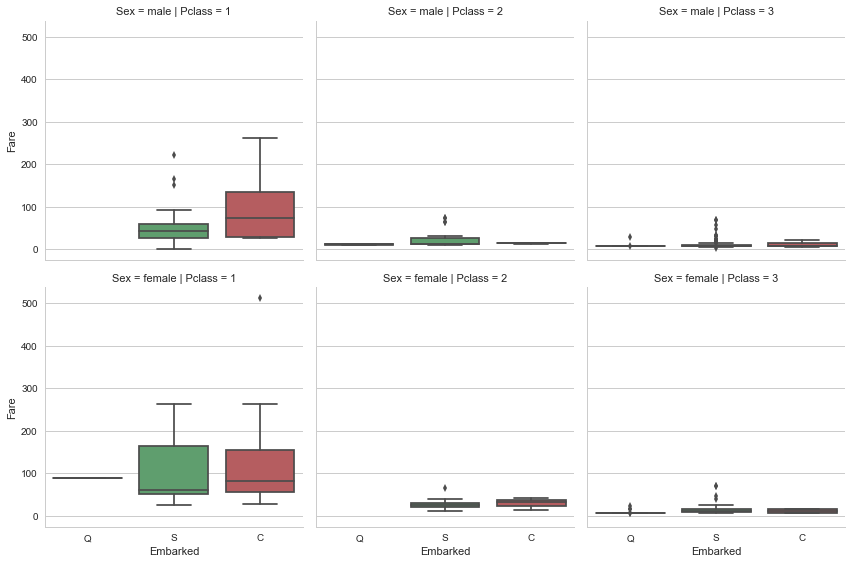

In [37]:
GenderAgeBoxPlotTest = sb.factorplot(x="Embarked", y="Fare", row="Sex", col="Pclass",data=testdata, kind="box")

We are looking for fare for Male Class 3 passenger Embarked from `S`.

Taking the mean of fare for that section of passengers that fall in that category

In [38]:
data[(data["Sex"]=="male") & (data["Embarked"]=="S") & (data["Pclass"]==3)]["Fare"].median()

8.05

As we can see from the above graph and the basic details for Males Embarked on "S" and buying a Class 3 ticket.

Thus we can safely approximate the missing fare for males of this category as 8.

In [39]:
testdata["Fare"] = testdata["Fare"].fillna(8)

In [40]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
LastName       418 non-null object
FirstName      418 non-null object
Title          418 non-null object
dtypes: float64(2), int64(4), object(7)
memory usage: 42.5+ KB


# Feature Engineering

## Name, Title, Life Stage, Matrimonial Status :
1. We have seperaedthe Last Name and First Name from asingle component.
2. Title Extraction for classifying a person into child male , adult male, chile female and adult female  
3. Importance of Person based on the Title (Rare , Common)

In [41]:
data.groupby("Title").size()

Title
Capt              1
Col               4
Don               1
Dona              1
Dr                8
Jonkheer          1
Lady              1
Major             2
Master           61
Miss            260
Mlle              2
Mme               1
Mr              757
Mrs             197
Ms                2
Rev               8
Sir               1
the Countess      1
dtype: int64

Matrimonial Status I have decided based on the titles, and somewhat understand gained with comparing age and position and the wealth, standard of living the comes with that position.
```
* Capt              > Rare > married        > adult
* Col               > Rare > married        > adult
* Don               > Rare > married        > adult
* Dona              > Rare > married        > adult
* Dr                > Rare > married        > adult
* Jonkheer          > Rare > married        > adult
* Lady              > Rare > married        > adult
* Major             > Rare > married        > adult
* Rev               > Rare > unmarried      > adult
* Sir               > Rare > married        > adult

* the Countess      > Rare > married        > adult

* Master            > Common > unmarried    > child if age is not given or age < 18 else adult 
* Miss              > Common > unmarried    > child if age is not given or age < 18 else adult
* Mlle              > Common > unmarried    > child if age is not given or age < 18 else adult (Adult as seen from the data)
* Mme               > Common > unmarried    > child if age is not given or age < 18 else adult (Adult as seen from the data)
* Mr                > Common > married      > adult
* Mrs               > Common > married      > adult
* Ms                > Common > unmarried    > adult
```

In [42]:
def royaltyStatus(row):
    if row["Title"] in ["Capt","Col","Don","Dona","Dr","Jonkheer","Lady","Major","Rev","Sir","the Countess"]:
        return "Rare"
    else:
        return "Common"
    

In [43]:
testdata["RoyalStatus"] = testdata.apply(lambda row: royaltyStatus(row),axis=1)
traindata["RoyalStatus"] = traindata.apply(lambda row: royaltyStatus(row),axis=1)

In [44]:
def matrimonialStatus(row):
    if row["Title"] in ["Rev","Master","Miss","Mlle","Mme","Ms"]:
        return "UnMarried"
    else:
        return "Married"

In [45]:
testdata["MarriageStatus"] = testdata.apply(lambda row: matrimonialStatus(row),axis=1)
traindata["MarriageStatus"] = traindata.apply(lambda row: matrimonialStatus(row),axis=1)

In [46]:
def lifeStage(row):
    if row["MarriageStatus"] == "Married":
        return "Adult"
    else:
        if row["Age"] > 18:
            return "Adult"
        else:
            return "Child"

In [47]:
testdata["LifeState"] = testdata.apply(lambda row: lifeStage(row),axis=1)
traindata["LifeState"] = traindata.apply(lambda row: lifeStage(row),axis=1)

In [48]:
def nameLength(row):
    return len(row["FirstName"].split()) + len(row["LastName"].split())

In [49]:
testdata["NameLength"] = testdata.apply(lambda row: nameLength(row), axis=1)
traindata["NameLength"] = traindata.apply(lambda row: nameLength(row), axis=1)

In [50]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
PassengerId       418 non-null int64
Pclass            418 non-null int64
Sex               418 non-null object
Age               332 non-null float64
SibSp             418 non-null int64
Parch             418 non-null int64
Ticket            418 non-null object
Fare              418 non-null float64
Cabin             91 non-null object
Embarked          418 non-null object
LastName          418 non-null object
FirstName         418 non-null object
Title             418 non-null object
RoyalStatus       418 non-null object
MarriageStatus    418 non-null object
LifeState         418 non-null object
NameLength        418 non-null int64
dtypes: float64(2), int64(5), object(10)
memory usage: 55.6+ KB


In [51]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
PassengerId       891 non-null int64
Survived          891 non-null int64
Pclass            891 non-null int64
Sex               891 non-null object
Age               714 non-null float64
SibSp             891 non-null int64
Parch             891 non-null int64
Ticket            891 non-null object
Fare              891 non-null float64
Cabin             204 non-null object
Embarked          891 non-null object
LastName          891 non-null object
FirstName         891 non-null object
Title             891 non-null object
RoyalStatus       891 non-null object
MarriageStatus    891 non-null object
LifeState         891 non-null object
NameLength        891 non-null int64
dtypes: float64(2), int64(6), object(10)
memory usage: 125.4+ KB


In [52]:
testdata.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,FirstName,Title,RoyalStatus,MarriageStatus,LifeState,NameLength
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,Kelly,James,Mr,Common,Married,Adult,2
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,Wilkes,James Ellen Needs,Mrs,Common,Married,Adult,4
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,Myles,Thomas Francis,Mr,Common,Married,Adult,3
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,Wirz,Albert,Mr,Common,Married,Adult,2
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,Hirvonen,Alexander Helga E Lindqvist,Mrs,Common,Married,Adult,5


In [53]:
traindata.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,FirstName,Title,RoyalStatus,MarriageStatus,LifeState,NameLength
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Owen Harris,Mr,Common,Married,Adult,3
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,John Bradley Florence Briggs Thayer,Mrs,Common,Married,Adult,6
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Laina,Miss,Common,UnMarried,Adult,2
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Jacques Heath Lily May Peel,Mrs,Common,Married,Adult,6
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,William Henry,Mr,Common,Married,Adult,3


# Features
So the features that we are going to work with are :
    1. PassengerId
    2. Pclass
    3. Sex
    4. SibSp
    5. Parch
    6. Fare
    7. Embarked
    8. Title
    9. MarriageStatus
    10. LifeStage
    11. NameLength
    12. Ticket
    13. RoyalStatus
And our Target Variable will be ``Survived``

## Encoding Categorical Features

The encoding that we will be following for different categorical features : 

1. One Hot Encoding : Sex, Embarked
2. Numerical Encoding : Ticket, Title, MarriageStatus, LifeStage, RoyalStatus

This has to be done for both Training Data and Test Data

In [54]:
from sklearn.preprocessing import LabelEncoder,LabelBinarizer

In [55]:
lb = LabelBinarizer()    # https://stackoverflow.com/a/45248055  # For one hot encoding purpose, 
                                                                        # first it converts into label then one hot encodes the label, 
                                                                        # by default it returns a dense matrix
le = LabelEncoder()      # For numberical ecoding

In [56]:
labelsToBinarize = ["Embarked", "Title"]
labelsToEncode = ["Ticket","RoyalStatus","MarriageStatus","LifeState","Sex"]

# https://stackoverflow.com/q/40456867
# Label Binarizer will give muliplte rows and they will be numpy array
# So they would have to be converted to pandas dataframe and then appened column wise  

#### Encoding Training Data

In [57]:
for label in labelsToBinarize:
    if label == "Embarked":
        lb.fit(["S","C","Q"])
    if label == "Title":
        lb.fit(["Capt","Col","Don","Dona","Dr","Jonkheer","Lady","Major","Rev","Sir","the Countess","Master","Miss","Mlle","Mme","Mr","Mrs","Ms"])    
    temp = lb.transform(traindata[label])
    df = pd.DataFrame(temp)
    df.rename(columns=lambda x: str(label)+"_"+str(x), inplace=True)
    # traindata.drop([label], axis=1)
    traindata = pd.concat([traindata,df], axis=1, join_axes=[traindata.index])

for label in labelsToEncode:
    traindata[label] = le.fit_transform(traindata[label])

#### Encoding Testing Data

In [58]:
for label in labelsToBinarize:
    if label == "Embarked":
        lb.fit(["S","C","Q"])
    if label == "Title":
        lb.fit(["Capt","Col","Don","Dona","Dr","Jonkheer","Lady","Major","Rev","Sir","the Countess","Master","Miss","Mlle","Mme","Mr","Mrs","Ms"])    
    temp = lb.transform(testdata[label])
    df = pd.DataFrame(temp)
    df.rename(columns=lambda x: str(label)+"_"+str(x), inplace=True)
    # testdata.drop([label], axis=1)
    testdata = pd.concat([testdata,df], axis=1, join_axes=[testdata.index])

for label in labelsToEncode:
    testdata[label] = le.fit_transform(testdata[label])

In [59]:
print(testdata.shape,traindata.shape)

# print(testdata.info())
# print(traindata.info())
traindata.head()

((418, 38), (891, 39))


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title_8,Title_9,Title_10,Title_11,Title_12,Title_13,Title_14,Title_15,Title_16,Title_17
0,1,0,3,1,22.0,1,0,523,7.2500,NaN,...,0,0,0,0,1,0,0,0,0,0
1,2,1,1,0,38.0,1,0,596,71.2833,C85,...,0,0,0,0,0,1,0,0,0,0
2,3,1,3,0,26.0,0,0,669,7.9250,NaN,...,0,1,0,0,0,0,0,0,0,0
3,4,1,1,0,35.0,1,0,49,53.1000,C123,...,0,0,0,0,0,1,0,0,0,0
4,5,0,3,1,35.0,0,0,472,8.0500,NaN,...,0,0,0,0,1,0,0,0,0,0


## Feature Scaling

1. Fare

This has to be done for both Training Data and Test Data

In [60]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler().fit(traindata[['Fare']])
traindata[['Fare']] = std_scale.transform(traindata[['Fare']])


std_scale = StandardScaler().fit(testdata[['Fare']])
testdata[['Fare']] = std_scale.transform(testdata[['Fare']])

In [61]:
# print(testdata.head())
# print(traindata.head())

Finally, Lets look at correlations of engineered as well as categorial features with the other features

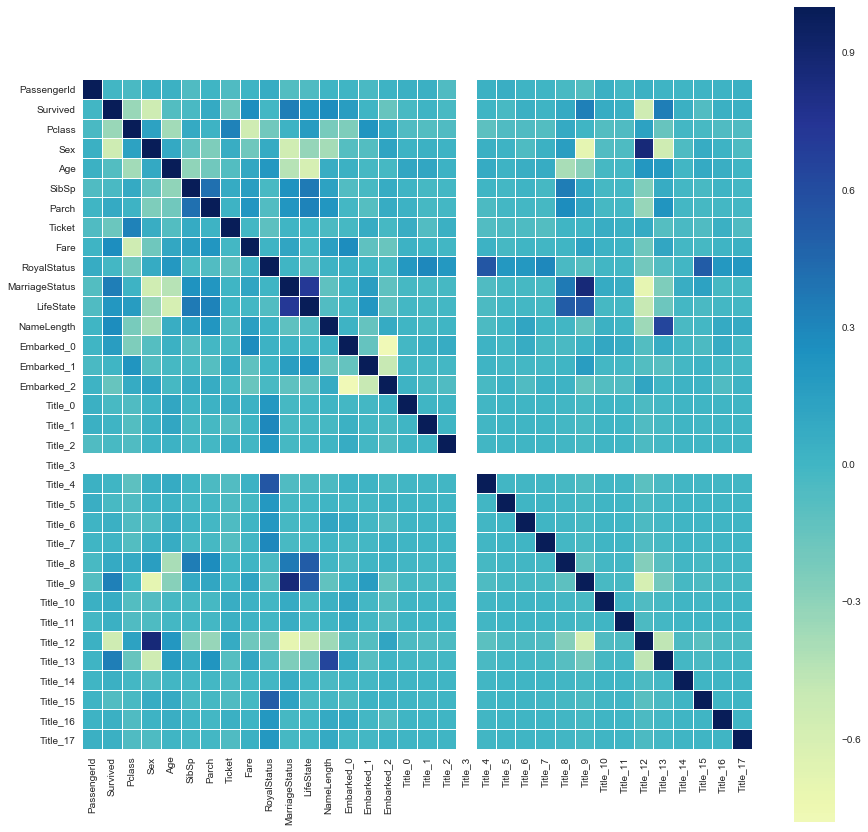

In [62]:
# HeatMap for the Correlations 
sb.set(style="whitegrid")
pyplot.figure(figsize=(15,15))
CorrHeatMap = sb.heatmap(traindata.corr(method='pearson'),square=True, vmax=1, linecolor="white", linewidths=0.01, center=0, cmap="YlGnBu")

In [63]:
traindata.corr(method='pearson')["Survived"]

PassengerId      -0.005007
Survived          1.000000
Pclass           -0.338481
Sex              -0.543351
Age              -0.077221
SibSp            -0.035322
Parch             0.081629
Ticket           -0.164549
Fare              0.257307
RoyalStatus      -0.012054
MarriageStatus    0.341560
LifeState         0.207380
NameLength        0.275181
Embarked_0        0.168240
Embarked_1        0.003650
Embarked_2       -0.149683
Title_0          -0.026456
Title_1           0.011329
Title_2          -0.026456
Title_3                NaN
Title_4           0.008185
Title_5          -0.026456
Title_6           0.042470
Title_7           0.011329
Title_8           0.085221
Title_9           0.327093
Title_10          0.060095
Title_11          0.042470
Title_12         -0.549199
Title_13          0.339040
Title_14          0.042470
Title_15         -0.064988
Title_16          0.042470
Title_17          0.042470
Name: Survived, dtype: float64

# Prediction

We will be trying out Graphlab 

In [268]:
import graphlab as gl
# gl.get_dependencies()

In [269]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(traindata, test_size = 0.2)

In [270]:
# Getting the columns
# traindata.columns
train_df.shape

(712, 39)

In [320]:
trainComplete = gl.SFrame(traindata[['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp','Parch', 'Ticket', 'Fare', 'RoyalStatus', 'MarriageStatus', 'LifeState','NameLength', 'Embarked_0', 'Embarked_1', 'Embarked_2', 'Title_0','Title_1', 'Title_2', 'Title_3', 'Title_4', 'Title_5', 'Title_6','Title_7', 'Title_8', 'Title_9', 'Title_10', 'Title_11','Title_12', 'Title_13', 'Title_14', 'Title_15', 'Title_16','Title_17']])
test = gl.SFrame(test_df[['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp','Parch', 'Ticket', 'Fare', 'RoyalStatus', 'MarriageStatus', 'LifeState','NameLength', 'Embarked_0', 'Embarked_1', 'Embarked_2', 'Title_0','Title_1', 'Title_2', 'Title_3', 'Title_4', 'Title_5', 'Title_6','Title_7', 'Title_8', 'Title_9', 'Title_10', 'Title_11','Title_12', 'Title_13', 'Title_14', 'Title_15', 'Title_16','Title_17']])
train = gl.SFrame(train_df[['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp','Parch', 'Ticket', 'Fare', 'RoyalStatus', 'MarriageStatus', 'LifeState','NameLength', 'Embarked_0', 'Embarked_1', 'Embarked_2', 'Title_0','Title_1', 'Title_2', 'Title_3', 'Title_4', 'Title_5', 'Title_6','Title_7', 'Title_8', 'Title_9', 'Title_10', 'Title_11','Title_12', 'Title_13', 'Title_14', 'Title_15', 'Title_16','Title_17']])

### Boosted Tree

In [98]:
model_boostedTree = gl.boosted_trees_classifier.create(train, target='Survived')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



WARNING: Detected extremely low variance for feature(s) 'Title_3', 'Title_6' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 681

Number of classes           : 2

Number of feature columns   : 32

Number of unpacked features : 32

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Validation-accuracy | Training-log_loss | Validation-log_loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.009006     | 0.895742          | 0.774194            | 0.539663          | 0.578514            |

| 2         | 0.025017     | 0.911894          | 0.806452            | 0.448562          | 0.510471            |

| 3         | 0.034022     | 0.917768          | 0.806452            | 0.384116          | 0.484636            |

| 4         | 0.038026     | 0.928047          | 0.806452            | 0.340161          | 0.461139            |

| 5         | 0.046031     | 0.930984          | 0.806452            | 0.304016          | 0.468893            |

| 6         | 0.054036     | 0.935389          | 0.838710            | 0.273705          | 0.465140            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [101]:
results_boostedTree = model_boostedTree.evaluate(test)

In [121]:
# results_boostedTree

### SVM

In [122]:
model_svm = gl.svm_classifier.create(train, target='Survived')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



WARNING: Detected extremely low variance for feature(s) 'Title_3', 'Title_6' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

SVM:

--------------------------------------------------------

Number of examples          : 676

Number of classes           : 2

Number of feature columns   : 32

Number of unpacked features : 32

Number of coefficients    : 33

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 3        | 0.001479  | 0.019014     | 0.662722          | 0.722222            |

| 2         | 5        | 1.000000  | 0.051037     | 0.800296          | 0.805556            |

| 3         | 6        | 1.000000  | 0.053037     | 0.795858          | 0.722222            |

| 4         | 7        | 1.000000  | 0.056039     | 0.804734          | 0.722222            |

| 5         | 8        | 1.000000  | 0.058040     | 0.822485          | 0.777778            |

| 6         | 9        | 1.000000  | 0.063045     | 0.828402          | 0.777778            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

TERMINATED: Iteration limit reached.

This model may not be optimal. To improve it, consider increasing `max_iterations`.

In [123]:
results_svm = model_svm.evaluate(test)

In [134]:
results_svm

{'accuracy': 0.8100558659217877, 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        1        |   18  |
 |      1       |        1        |   53  |
 |      1       |        0        |   16  |
 |      0       |        0        |   92  |
 +--------------+-----------------+-------+
 [4 rows x 3 columns], 'f1_score': 0.7571428571428571, 'precision': 0.7464788732394366, 'recall': 0.7681159420289855}

### NeuralNets


We will be making a custom Neural Net, we are following the documentation given here under :

[Create a NeuralNet from Templates](https://turi.com/products/create/docs/graphlab.toolkits.deeplearning.html)

In [296]:
net = gl.deeplearning.create(train, 'Survived')

In [297]:
net.layers

layer[0]: FullConnectionLayer
  init_sigma = 0.01
  init_random = gaussian
  init_bias = 0
  num_hidden_units = 10
layer[1]: SigmoidLayer
layer[2]: FullConnectionLayer
  init_sigma = 0.01
  init_random = gaussian
  init_bias = 0
  num_hidden_units = 2
layer[3]: SoftmaxLayer

In [298]:
net.params['learning_rate'] = 0.008

In [299]:
model_nn = gl.neuralnet_classifier.create(train, target='Survived', network=net)

Using network:

### network layers ###
layer[0]: FullConnectionLayer
  init_sigma = 0.01
  init_random = gaussian
  init_bias = 0
  num_hidden_units = 10
layer[1]: SigmoidLayer
layer[2]: FullConnectionLayer
  init_sigma = 0.01
  init_random = gaussian
  init_bias = 0
  num_hidden_units = 2
layer[3]: SoftmaxLayer
### end network layers ###

### network parameters ###
learning_rate = 0.008
momentum = 0.9
### end network parameters ###

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Creating neuralnet using cpu

Training with batch size = 100

+-----------+----------+--------------+-------------------+---------------------+-----------------+

| Iteration | Examples | Elapsed Time | Training-accuracy | Validation-accuracy | Examples/second |

+-----------+----------+--------------+-------------------+---------------------+-----------------+

| 1         | 700      | 0.007131     | 0.617143          | 0.628571            | 98370.453125    |

| 2         | 700      | 0.017564     | 0.617143          | 0.628571            | 70469.609375    |

| 3         | 700      | 0.027578     | 0.617143          | 0.628571            | 70870.257812    |

| 4         | 700      | 0.033727     | 0.617143          | 0.628571            | 116114.929688   |

| 5         | 700      | 0.040811     | 0.617143          | 0.628571            | 100564.656250   |

| 6         | 700      | 0.046538     | 0.621429          | 0.571429            | 125199.882812   |

| 7         | 700      | 0.059010     | 0.612857          | 0.600000            | 56656.257812    |

| 8         | 700      | 0.064613     | 0.612857          | 0.571429            | 127665.320312   |

| 9         | 700      | 0.070695     | 0.632857          | 0.600000            | 117226.453125   |

| 10        | 700      | 0.078075     | 0.622857          | 0.600000            | 96375.421875    |

+-----------+----------+--------------+-------------------+---------------------+-----------------+

In [300]:
model_nn.evaluate(test)

{'accuracy': 0.6815642714500427, 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        0        |  107  |
 |      1       |        0        |   54  |
 |      0       |        1        |   3   |
 |      1       |        1        |   15  |
 +--------------+-----------------+-------+
 [4 rows x 3 columns]}

### KNN

In [306]:
model_knn = gl.nearest_neighbor_classifier.create(train, target='Survived')

Starting ball tree nearest neighbors model training.

+------------+--------------+

| Tree level | Elapsed Time |

+------------+--------------+

| 0          | 0us          |

+------------+--------------+

In [307]:
model_knn.evaluate(test)

+--------------+-------------+--------------+

| Query points | % Complete. | Elapsed Time |

+--------------+-------------+--------------+

| 1            | 0.5         | 1.001ms      |

| Done         |             | 22.016ms     |

+--------------+-------------+--------------+

+--------------+-------------+--------------+

| Query points | % Complete. | Elapsed Time |

+--------------+-------------+--------------+

| 1            | 0.5         | 999us        |

| Done         |             | 20.009ms     |

+--------------+-------------+--------------+

{'accuracy': 0.6089385474860335, 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        1        |   32  |
 |      1       |        1        |   31  |
 |      1       |        0        |   38  |
 |      0       |        0        |   78  |
 +--------------+-----------------+-------+
 [4 rows x 3 columns], 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+----+-----+
 | threshold | fpr | tpr | p  |  n  |
 +-----------+-----+-----+----+-----+
 |    0.0    | 1.0 | 1.0 | 69 | 110 |
 |   1e-05   | 1.0 | 1.0 | 69 | 110 |
 |   2e-05   | 1.0 | 1.0 | 69 | 110 |
 |   3e-05   | 1.0 | 1.0 | 69 | 110 |
 |   4e-05   | 1.0 | 1.0 | 69 | 110 |
 |   5e-05   | 1.0 | 1.0 | 69 | 110 |
 |   6e-05   | 1.0 | 1.0 | 69 | 110 |
 |   

### Random Forest

In [308]:
model_rf = gl.random_forest_classifier.create(train, target='Survived')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



WARNING: Detected extremely low variance for feature(s) 'Title_3', 'Title_6' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Random forest classifier:

--------------------------------------------------------

Number of examples          : 681

Number of classes           : 2

Number of feature columns   : 32

Number of unpacked features : 32

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Validation-accuracy | Training-log_loss | Validation-log_loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.042029     | 0.881057          | 0.677419            | 0.368405          | 0.468274            |

| 2         | 0.056037     | 0.881057          | 0.709677            | 0.361497          | 0.507301            |

| 3         | 0.063043     | 0.895742          | 0.774194            | 0.353517          | 0.464121            |

| 4         | 0.073049     | 0.895742          | 0.709677            | 0.352015          | 0.464018            |

| 5         | 0.078051     | 0.889868          | 0.709677            | 0.355704          | 0.466196            |

| 6         | 0.084056     | 0.891336          | 0.709677            | 0.355786          | 0.469833            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [309]:
model_rf.evaluate(test)

{'accuracy': 0.8435754189944135,
 'auc': 0.9009881422924897,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        1        |   14  |
 |      1       |        1        |   55  |
 |      1       |        0        |   14  |
 |      0       |        0        |   96  |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.7971014492753623,
 'log_loss': 0.4020324777770604,
 'precision': 0.7971014492753623,
 'recall': 0.7971014492753623,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+----+-----+
 | threshold | fpr | tpr | p  |  n  |
 +-----------+-----+-----+----+-----+
 |    0.0    | 1.0 | 1.0 | 69 | 110 |
 |   1e-05   | 1.0 | 1.0 | 69 | 110 |
 |   2e-05   | 1.0 | 1.0 | 69 | 11

In [314]:
### Decision Tree

In [315]:
model_dt = gl.decision_tree_classifier.create(train,target='Survived')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



WARNING: Detected extremely low variance for feature(s) 'Title_3', 'Title_6' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 679

Number of classes           : 2

Number of feature columns   : 32

Number of unpacked features : 32

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Validation-accuracy | Training-log_loss | Validation-log_loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.027016     | 0.892489          | 0.696970            | 0.539627          | 0.609732            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [316]:
model_dt.evaluate(test)

{'accuracy': 0.7988826815642458,
 'auc': 0.8969038208168644,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        1        |   16  |
 |      1       |        1        |   49  |
 |      1       |        0        |   20  |
 |      0       |        0        |   94  |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.7313432835820897,
 'log_loss': 0.5633990093323612,
 'precision': 0.7538461538461538,
 'recall': 0.7101449275362319,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+----+-----+
 | threshold | fpr | tpr | p  |  n  |
 +-----------+-----+-----+----+-----+
 |    0.0    | 1.0 | 1.0 | 69 | 110 |
 |   1e-05   | 1.0 | 1.0 | 69 | 110 |
 |   2e-05   | 1.0 | 1.0 | 69 | 11

In [317]:
### Logistic Classifier

In [318]:
model_lc = gl.logistic_classifier.create(train,target="Survived")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



WARNING: Detected extremely low variance for feature(s) 'Title_0', 'Title_2', 'Title_3', 'Title_6' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Logistic regression:

--------------------------------------------------------

Number of examples          : 667

Number of classes           : 2

Number of feature columns   : 32

Number of unpacked features : 32

Number of coefficients    : 33

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.026012     | 0.827586          | 0.933333            |

| 2         | 3        | 0.045025     | 0.832084          | 0.933333            |

| 3         | 4        | 0.052030     | 0.829085          | 0.933333            |

| 4         | 5        | 0.060036     | 0.829085          | 0.933333            |

| 5         | 6        | 0.066040     | 0.829085          | 0.933333            |

| 6         | 7        | 0.078048     | 0.829085          | 0.933333            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

In [319]:
model_lc.evaluate(test)

{'accuracy': 0.8268156424581006,
 'auc': 0.8968379446640312,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        1        |   16  |
 |      1       |        1        |   54  |
 |      1       |        0        |   15  |
 |      0       |        0        |   94  |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.7769784172661871,
 'log_loss': 0.41648188932411556,
 'precision': 0.7714285714285715,
 'recall': 0.782608695652174,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+----+-----+
 | threshold | fpr | tpr | p  |  n  |
 +-----------+-----+-----+----+-----+
 |    0.0    | 1.0 | 1.0 | 69 | 110 |
 |   1e-05   | 1.0 | 1.0 | 69 | 110 |
 |   2e-05   | 1.0 | 1.0 | 69 | 11

####   Finally Submitting Logistic Classifier
Re-Training on complete available dataset

In [321]:
model_lc = gl.logistic_classifier.create(trainComplete,target="Survived")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



WARNING: Detected extremely low variance for feature(s) 'Title_3' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Logistic regression:

--------------------------------------------------------

Number of examples          : 843

Number of classes           : 2

Number of feature columns   : 32

Number of unpacked features : 32

Number of coefficients    : 33

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.008003     | 0.838671          | 0.812500            |

| 2         | 3        | 0.026016     | 0.841044          | 0.812500            |

| 3         | 4        | 0.033020     | 0.835113          | 0.833333            |

| 4         | 5        | 0.041025     | 0.835113          | 0.833333            |

| 5         | 6        | 0.048029     | 0.835113          | 0.833333            |

| 6         | 7        | 0.056037     | 0.835113          | 0.833333            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

# Submission 

In [322]:
submission = gl.SFrame(testdata[['PassengerId', 'Pclass', 'Sex', 'SibSp','Parch', 'Ticket', 'Fare', 'RoyalStatus', 'MarriageStatus', 'LifeState','NameLength', 'Embarked_0', 'Embarked_1', 'Embarked_2', 'Title_0','Title_1', 'Title_2', 'Title_3', 'Title_4', 'Title_5', 'Title_6','Title_7', 'Title_8', 'Title_9', 'Title_10', 'Title_11','Title_12', 'Title_13', 'Title_14', 'Title_15', 'Title_16','Title_17']])

In [323]:
# submission_frame = model_svm.classify(submission)
# submission_frame = model_boostedTress.classify(submission)
# submission_frame = model_rf.classify(submission)
submission_frame = model_lc.classify(submission)
submission_df = submission_frame.to_dataframe()

In [324]:
submission_df = pd.DataFrame({
    "PassengerId" : testdata["PassengerId"],
    "Survived": submission_df["class"]
})
submission_df.to_csv("data/titanic_submission.csv", index=False)

In [325]:
submission_frame


class,probability
0,0.901465586398
1,0.683153272661
0,0.772531591217
0,0.906245381613
1,0.652160908199
0,0.901160405199
1,0.666823421719
0,0.898305052189
1,0.887404789454
0,0.96523409105
